In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

fn = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        fn.append(os.path.join(dirname, filename))
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-lifestyle-dataset/student_lifestyle_dataset.csv


In [10]:
df = pd.read_csv(fn[0])
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


In [5]:
df.isnull().sum()

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64

In [7]:
df.columns

Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')

In [8]:
df['Stress_Level'].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

In [11]:
encoding = {'High': 2, 'Low': 0, 'Moderate': 1}
df['Stress_Level'] = df['Stress_Level'].map(encoding)
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,1
1,2,5.3,3.5,8.0,4.2,3.0,2.75,0
2,3,5.1,3.9,9.2,1.2,4.6,2.67,0
3,4,6.5,2.1,7.2,1.7,6.5,2.88,1
4,5,8.1,0.6,6.5,2.2,6.6,3.51,2
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,1
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,1
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,1
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,2


In [12]:
import pandas as pd

# Set Student_ID as the index
df.set_index('Student_ID', inplace=True)

df

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
Student_ID,,,,,,,
1,6.9,3.8,8.7,2.8,1.8,2.99,1
2,5.3,3.5,8.0,4.2,3.0,2.75,0
3,5.1,3.9,9.2,1.2,4.6,2.67,0
4,6.5,2.1,7.2,1.7,6.5,2.88,1
5,8.1,0.6,6.5,2.2,6.6,3.51,2
...,...,...,...,...,...,...,...
1996,6.5,0.2,7.4,2.1,7.8,3.32,1
1997,6.3,2.8,8.8,1.5,4.6,2.65,1
1998,6.2,0.0,6.2,0.8,10.8,3.14,1


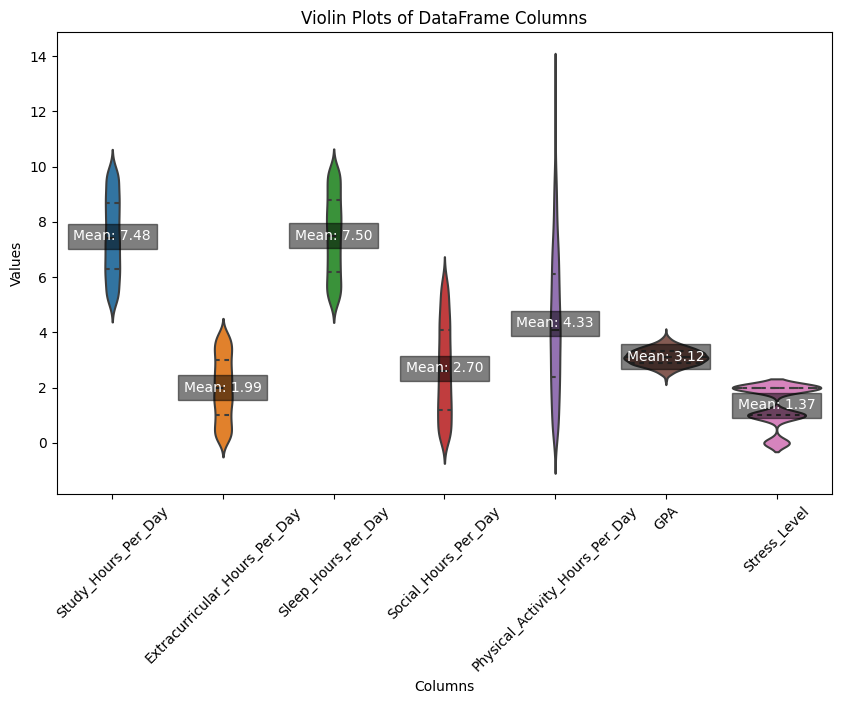

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create violin plots
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, inner='quartile')

# Add labels and title
plt.title('Violin Plots of DataFrame Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# Tilt x-axis labels
plt.xticks(rotation=45)

# Add annotations
for i, column in enumerate(df.columns):
    plt.text(i, df[column].mean(), f'Mean: {df[column].mean():.2f}', ha='center', va='center', fontsize=10, color='white', bbox=dict(facecolor='black', alpha=0.5))

plt.show()


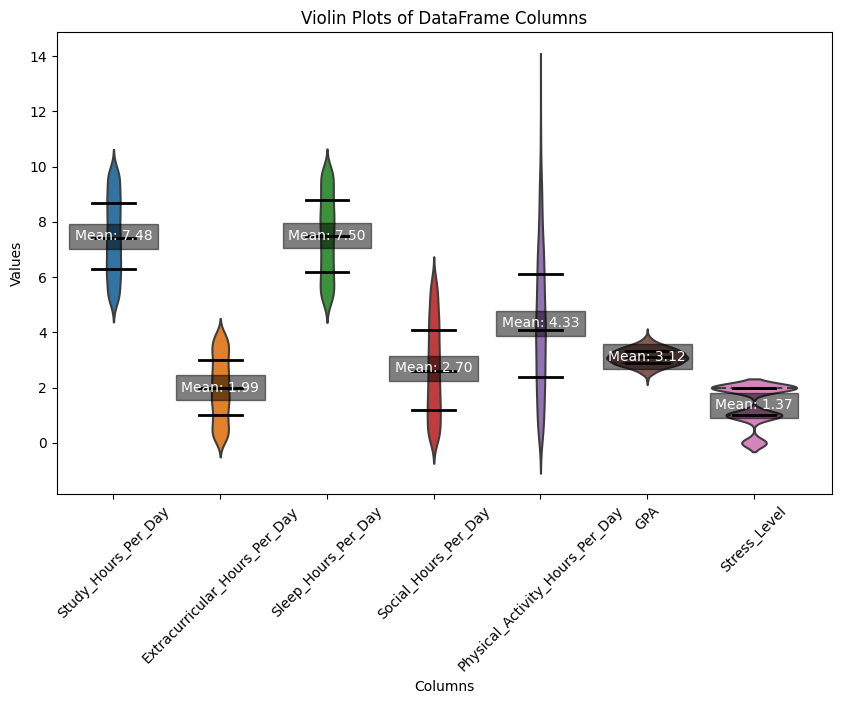

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create violin plots
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, inner='quartile')

# Add labels and title
plt.title('Violin Plots of DataFrame Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# Tilt x-axis labels
plt.xticks(rotation=45)

# Add annotations
for i, column in enumerate(df.columns):
    plt.text(i, df[column].mean(), f'Mean: {df[column].mean():.2f}', ha='center', va='center', fontsize=10, color='white', bbox=dict(facecolor='black', alpha=0.5))

# Show bars for quartiles
for i, column in enumerate(df.columns):
    quartiles = df[column].quantile([0.25, 0.5, 0.75])
    for q in quartiles:
        plt.plot([i - 0.2, i + 0.2], [q, q], color='black', linewidth=2)

plt.show()


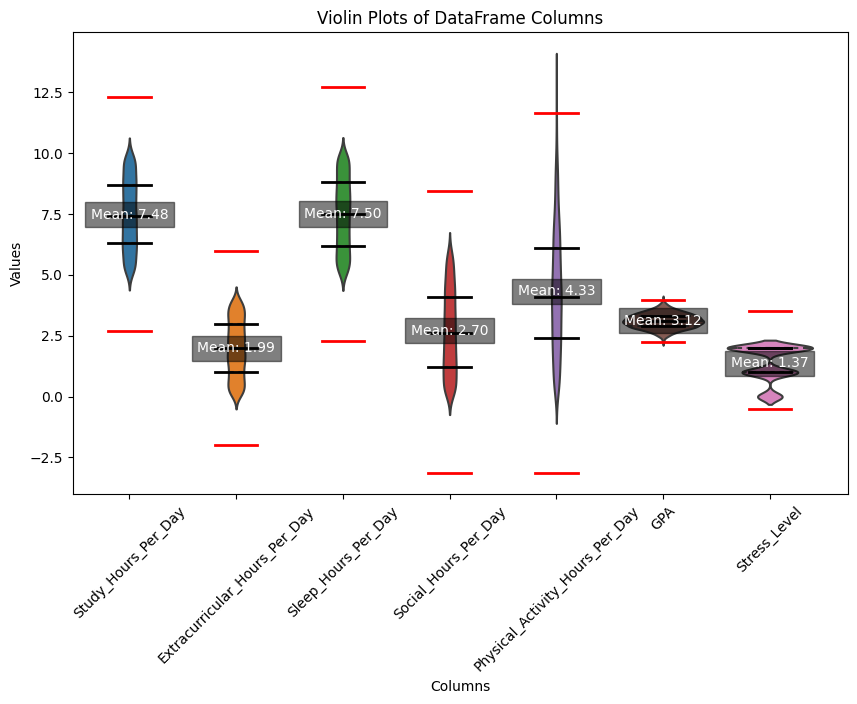

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create violin plots
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, inner='quartile')

# Add labels and title
plt.title('Violin Plots of DataFrame Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# Tilt x-axis labels
plt.xticks(rotation=45)

# Add annotations
for i, column in enumerate(df.columns):
    plt.text(i, df[column].mean(), f'Mean: {df[column].mean():.2f}', ha='center', va='center', fontsize=10, color='white', bbox=dict(facecolor='black', alpha=0.5))

# Show bars for quartiles and outliers
for i, column in enumerate(df.columns):
    quartiles = df[column].quantile([0.25, 0.5, 0.75])
    for q in quartiles:
        plt.plot([i - 0.2, i + 0.2], [q, q], color='black', linewidth=2)
    
    # Calculate outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Plot outlier bounds
    plt.plot([i - 0.2, i + 0.2], [lower_bound, lower_bound], color='red', linewidth=2)
    plt.plot([i - 0.2, i + 0.2], [upper_bound, upper_bound], color='red', linewidth=2)

plt.show()


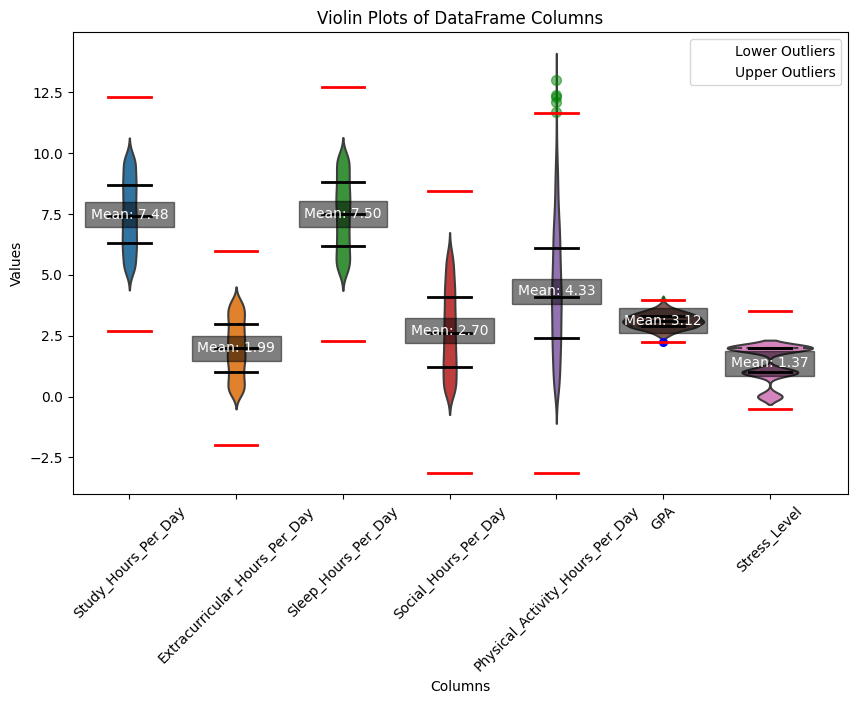

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create violin plots
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, inner='quartile')

# Add labels and title
plt.title('Violin Plots of DataFrame Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# Tilt x-axis labels
plt.xticks(rotation=45)

# Add annotations
for i, column in enumerate(df.columns):
    plt.text(i, df[column].mean(), f'Mean: {df[column].mean():.2f}', ha='center', va='center', fontsize=10, color='white', bbox=dict(facecolor='black', alpha=0.5))

# Show bars for quartiles and outliers
for i, column in enumerate(df.columns):
    quartiles = df[column].quantile([0.25, 0.5, 0.75])
    for q in quartiles:
        plt.plot([i - 0.2, i + 0.2], [q, q], color='black', linewidth=2)
    
    # Calculate outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Plot outlier bounds
    plt.plot([i - 0.2, i + 0.2], [lower_bound, lower_bound], color='red', linewidth=2)
    plt.plot([i - 0.2, i + 0.2], [upper_bound, upper_bound], color='red', linewidth=2)
    
    # Calculate number of outliers
    lower_outliers = df[column][df[column] < lower_bound]
    upper_outliers = df[column][df[column] > upper_bound]
    
    # Plot bubbles for outliers
    plt.scatter([i] * len(lower_outliers), lower_outliers, s=len(lower_outliers) * 10, color='blue', alpha=0.5, label='Lower Outliers' if i == 0 else "")
    plt.scatter([i] * len(upper_outliers), upper_outliers, s=len(upper_outliers) * 10, color='green', alpha=0.5, label='Upper Outliers' if i == 0 else "")

# Add legend
plt.legend()

plt.show()


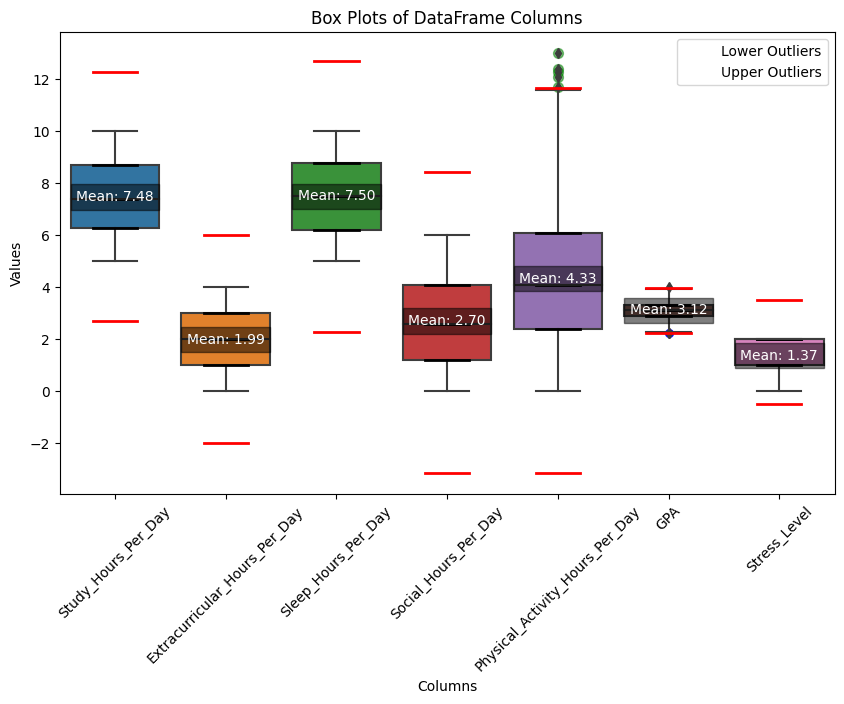

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)

# Add labels and title
plt.title('Box Plots of DataFrame Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# Tilt x-axis labels
plt.xticks(rotation=45)

# Add annotations
for i, column in enumerate(df.columns):
    plt.text(i, df[column].mean(), f'Mean: {df[column].mean():.2f}', ha='center', va='center', fontsize=10, color='white', bbox=dict(facecolor='black', alpha=0.5))

# Show bars for quartiles and outliers
for i, column in enumerate(df.columns):
    quartiles = df[column].quantile([0.25, 0.5, 0.75])
    for q in quartiles:
        plt.plot([i - 0.2, i + 0.2], [q, q], color='black', linewidth=2)
    
    # Calculate outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Plot outlier bounds
    plt.plot([i - 0.2, i + 0.2], [lower_bound, lower_bound], color='red', linewidth=2)
    plt.plot([i - 0.2, i + 0.2], [upper_bound, upper_bound], color='red', linewidth=2)
    
    # Calculate number of outliers
    lower_outliers = df[column][df[column] < lower_bound]
    upper_outliers = df[column][df[column] > upper_bound]
    
    # Plot bubbles for outliers
    plt.scatter([i] * len(lower_outliers), lower_outliers, s=len(lower_outliers) * 10, color='blue', alpha=0.5, label='Lower Outliers' if i == 0 else "")
    plt.scatter([i] * len(upper_outliers), upper_outliers, s=len(upper_outliers) * 10, color='green', alpha=0.5, label='Upper Outliers' if i == 0 else "")

# Add legend
plt.legend()

plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

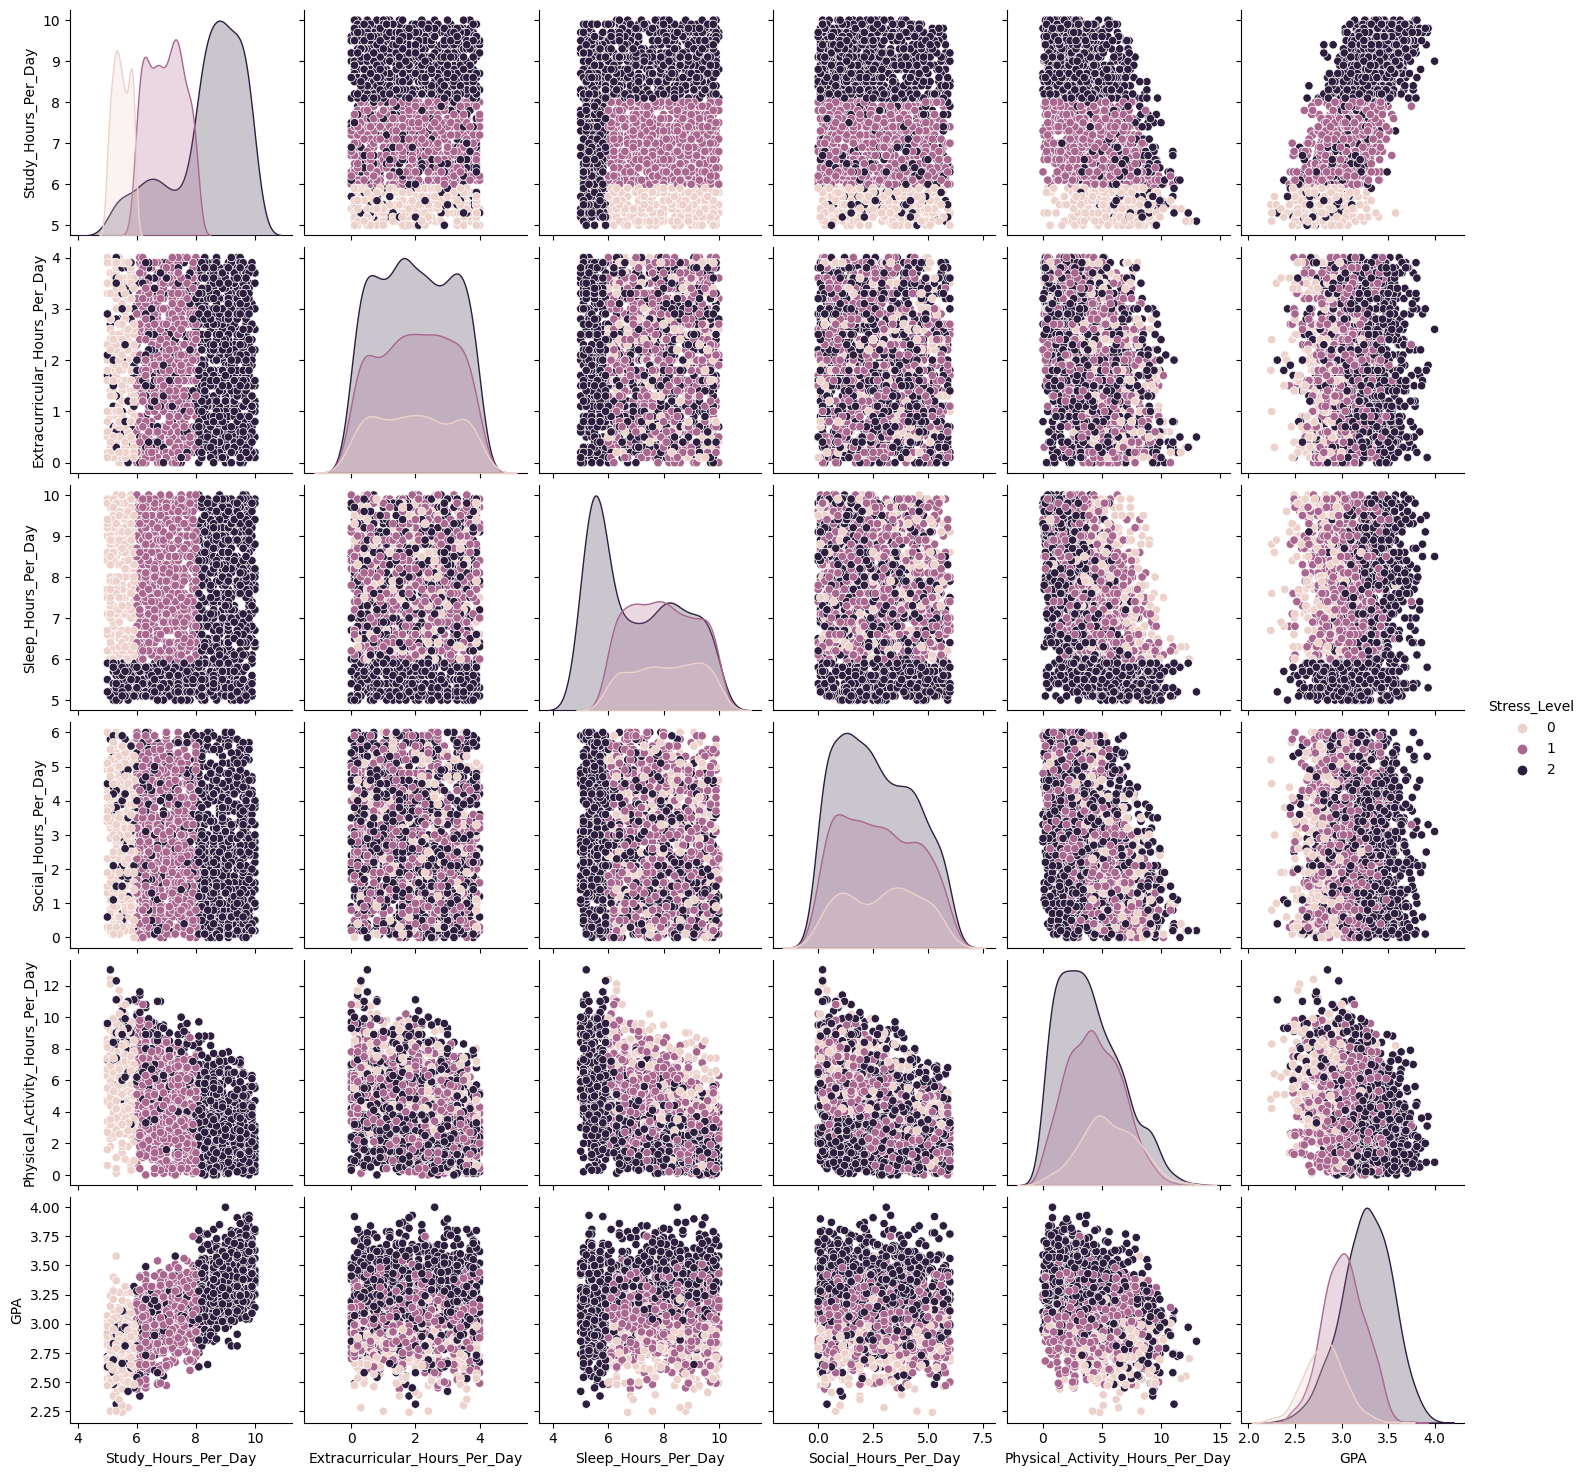

In [25]:
# Pair plot to visualize relationships
sns.pairplot(df, hue='Stress_Level')
plt.show()

In [27]:
df.corre

Index(['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')

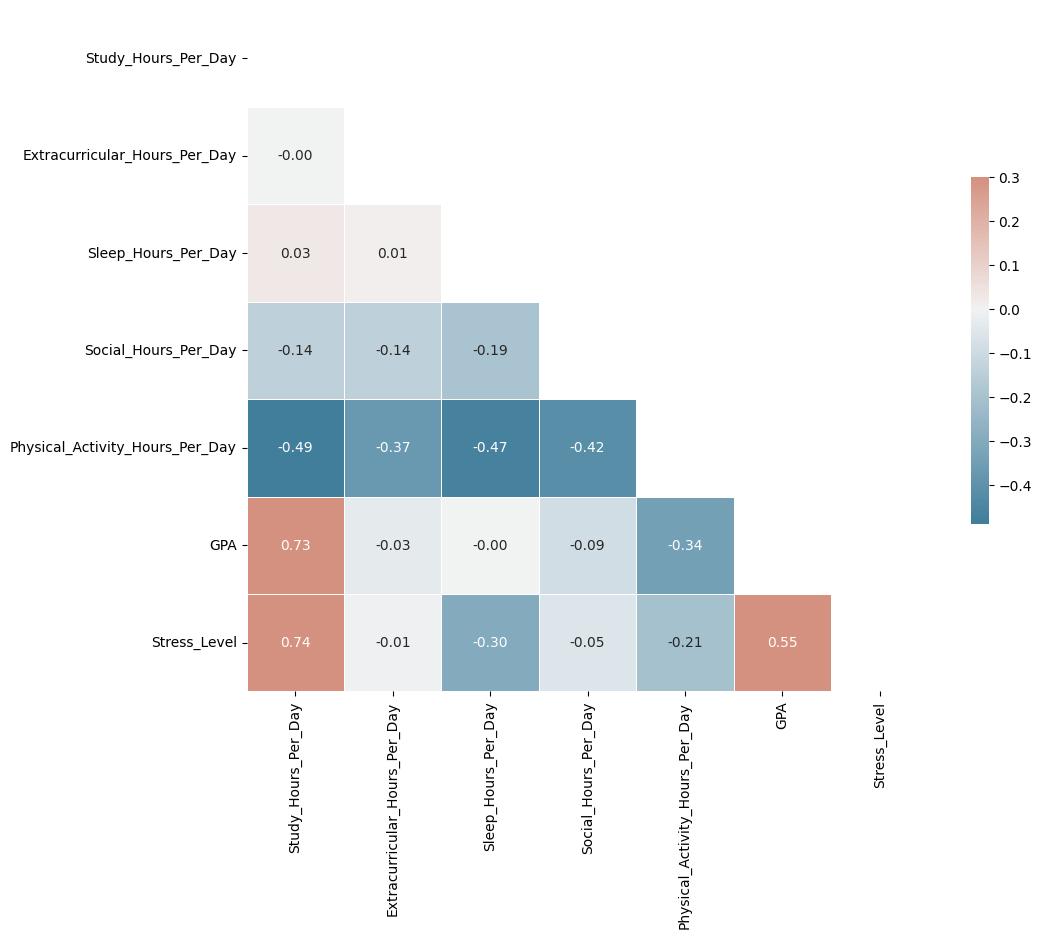

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataframe
# df = pd.read_csv('your_dataframe.csv')

# Calculate the correlation matrix
corr = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f", cbar_kws={"shrink": .5})

plt.show()


In [30]:
import pandas as pd

# Load your dataframe
# df = pd.read_csv('your_dataframe.csv')

# Create a new dataframe by dropping the specified columns
new_df = df.drop(columns=['Extracurricular_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day'])

# Display the new dataframe
new_df

,Study_Hours_Per_Day,Sleep_Hours_Per_Day,GPA,Stress_Level
Student_ID,,,,
1,6.9,8.7,2.99,1
2,5.3,8.0,2.75,0
3,5.1,9.2,2.67,0
4,6.5,7.2,2.88,1
5,8.1,6.5,3.51,2
...,...,...,...,...
1996,6.5,7.4,3.32,1
1997,6.3,8.8,2.65,1
1998,6.2,6.2,3.14,1


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

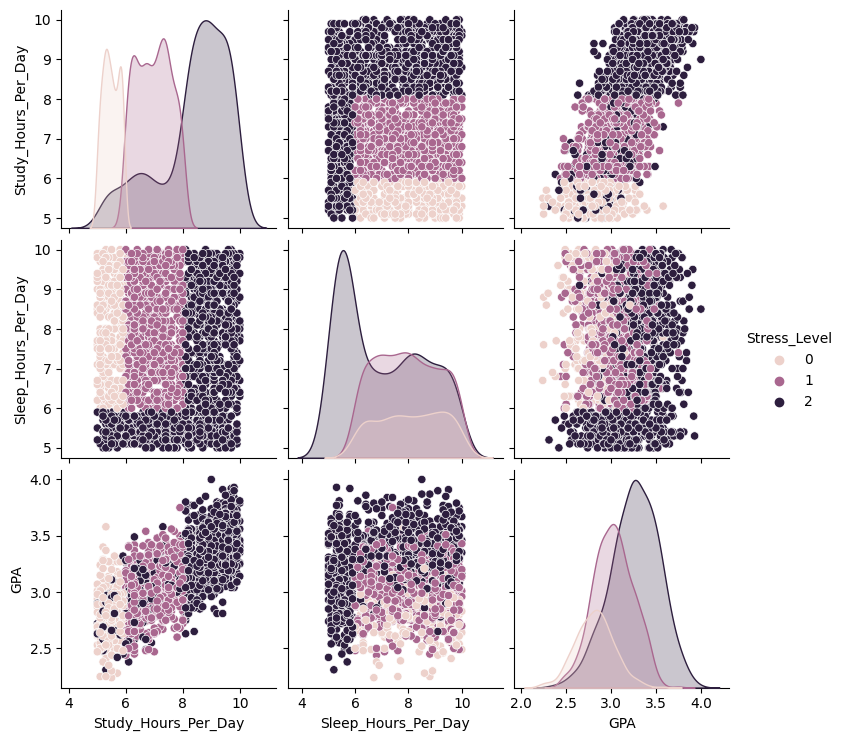

In [31]:
# Pair plot to visualize relationships
sns.pairplot(new_df, hue='Stress_Level')
plt.show()

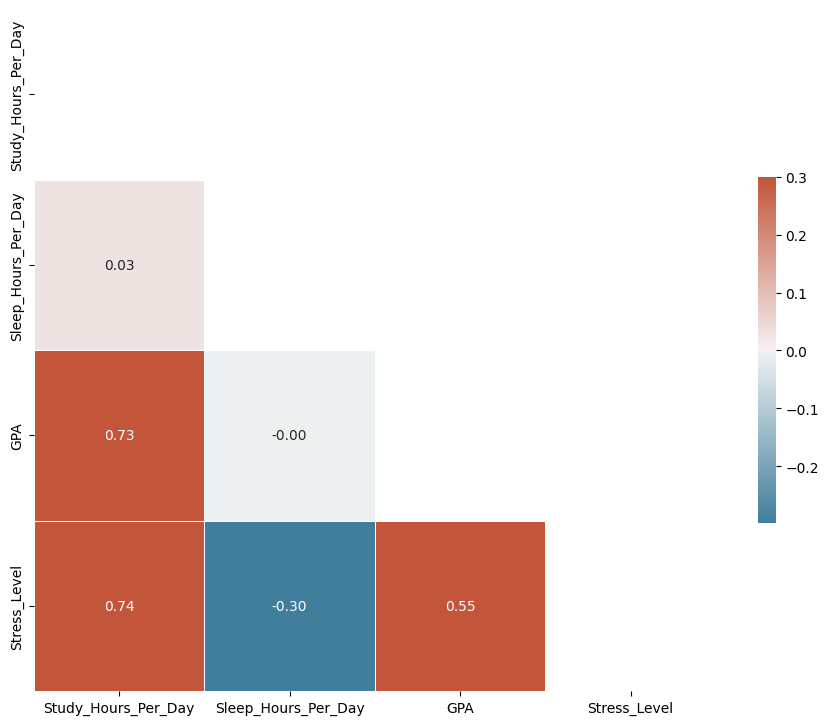

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataframe
# df = pd.read_csv('your_dataframe.csv')

# Calculate the correlation matrix
corr = new_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f", cbar_kws={"shrink": .5})

plt.show()


In [33]:
new_df

,Study_Hours_Per_Day,Sleep_Hours_Per_Day,GPA,Stress_Level
Student_ID,,,,
1,6.9,8.7,2.99,1
2,5.3,8.0,2.75,0
3,5.1,9.2,2.67,0
4,6.5,7.2,2.88,1
5,8.1,6.5,3.51,2
...,...,...,...,...
1996,6.5,7.4,3.32,1
1997,6.3,8.8,2.65,1
1998,6.2,6.2,3.14,1


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataframe
# new_df = pd.read_csv('your_new_dataframe.csv')

# Define the target variable
target = 'Stress_Level'

# Split the data into training and remaining sets (70% training, 30% remaining)
train_df, remaining_df = train_test_split(new_df, test_size=0.3, stratify=new_df[target], random_state=42)

# Split the remaining data into testing and validation sets (50% testing, 50% validation of the remaining 30%)
test_df, val_df = train_test_split(remaining_df, test_size=0.5, stratify=remaining_df[target], random_state=42)

# Display the sizes of the splits
print(f'Training set size: {len(train_df)}')

Training set size: 1400


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# Separate features and target variable
X_train = train_df.drop(columns=[target])
y_train = train_df[target]
X_test = test_df.drop(columns=[target])
y_test = test_df[target]

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00       155

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Load your dataframe
# new_df = pd.read_csv('your_new_dataframe.csv')

# Define the target variable
target = 'Stress_Level'

# Split the data into training and remaining sets (70% training, 30% remaining)
train_df, remaining_df = train_test_split(new_df, test_size=0.3, stratify=new_df[target], random_state=42)

# Split the remaining data into testing and validation sets (50% testing, 50% validation of the remaining 30%)
test_df, val_df = train_test_split(remaining_df, test_size=0.5, stratify=remaining_df[target], random_state=42)

# Separate features and target variable
X_train = train_df.drop(columns=[target])
y_train = train_df[target]
X_test = test_df.drop(columns=[target])
y_test = test_df[target]

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Check if predict_proba returns a 2D array
if len(rf_model.classes_) > 1:
    y_pred_prob = rf_model.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
else:
    roc_auc = 'N/A'

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a dataframe to store the results
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

# Print the results
print(results_df)

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print('Confusion Matrix:')
print(conf_matrix)


      Metric  Score
0   Accuracy    1.0
1  Precision    1.0
2     Recall    1.0
3   F1 Score    1.0
4    ROC AUC    1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00       155

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:
[[ 44   0   0]
 [  0 101   0]
 [  0   0 155]]


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Load your dataframe
# new_df = pd.read_csv('your_new_dataframe.csv')

# Define the target variable
target = 'Stress_Level'

# Split the data into training and remaining sets (70% training, 30% remaining)
train_df, remaining_df = train_test_split(new_df, test_size=0.3, stratify=new_df[target], random_state=42)

# Split the remaining data into testing and validation sets (50% testing, 50% validation of the remaining 30%)
test_df, val_df = train_test_split(remaining_df, test_size=0.5, stratify=remaining_df[target], random_state=42)

# Separate features and target variable
X_train = train_df.drop(columns=[target])
y_train = train_df[target]
X_test = test_df.drop(columns=[target])
y_test = test_df[target]

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(rf_model, X_train, y_train, cv=kfold, 
                             scoring='accuracy')

# Fit the model on the entire training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Check if predict_proba returns a 2D array
if len(rf_model.classes_) > 1:
    y_pred_prob = rf_model.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
else:
    roc_auc = 'N/A'

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a dataframe to store the results
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

# Print the cross-validation results
print(f'Cross-validation results: {cv_results}')
print(f'Mean cross-validation accuracy: {cv_results.mean()}')

# Print the results
print(results_df)

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print('Confusion Matrix:')
print(conf_matrix)


Cross-validation results: [1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 1.0
      Metric  Score
0   Accuracy    1.0
1  Precision    1.0
2     Recall    1.0
3   F1 Score    1.0
4    ROC AUC    1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00       155

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:
[[ 44   0   0]
 [  0 101   0]
 [  0   0 155]]
